# **AGV QR Code Alignment and Stacker Crane Adjustment Analysis**
## **Objective**
The purpose of this analysis is to assess the alignment between the AGV QR codes, the stacker crane’s fork position, and the T-Port distances. Misalignments in these components can lead to inefficiencies in material handling and potential operational errors. This study will help determine whether adjustments need to be made to the QR code positions, the crane’s movement path, or the T-Port heights.

<img src="assets/Stacker.png" alt="Stacker Crane Alignment" width="300" height="500">

---

## **Key Measurements and Their Importance**
### **1. Fork Center to T-Port Center Distance & Crane Move Center to T-Port Distance**
- The **Fork Center to T-Port Center Distance** is used to check whether the AGV QR code on the floor is properly aligned with the fork when extended.
- The **Crane Move Center to T-Port Distance** evaluates whether the AGV QR code is aligned with the crane’s fork center position **before extension**.

#### **Why is this important?**
✅ **Crane Move Center to T-Port Distance**  
- This metric is crucial for identifying **QR misalignment**, as the AGV follows the QR placement.  
- If misaligned, the **pallet placement onto the T-Port will also be misaligned**, which can:
  - Cause the **pallet to snap/break**.
  - Result in **goods falling due to tilting**.  
- This analysis helps determine **whether to adjust the QR position or recalibrate the crane**.
- If the QR is aligned but the **crane is not**, we need to contact:
  - The **stacker crane supplier** (to adjust positioning parameters).
  - The **flooring supplier** (to smoothen floors for misaligned T-Port stands).

✅ **Fork Center to T-Port Center Distance**  
- Ensures that **the crane is properly aligned with the QR center**, so that when the pallet is placed, it is **centered correctly**.  
- If misaligned, the fork might:
  - **Go too far left or right**, hitting the stacker crane’s **profile sensor** (length of pallet max sensor).
  - **Trigger oversize sensors**, preventing storage and requiring **manual intervention**.

#### **Interpreting the Values**
- **Negative values**: The laser aligned with the QR center is pointing towards the left side of the crane fork's midpoint.
- **Positive values**: The laser aligned with the QR center is pointing towards the right side of the crane fork’s midpoint.
- If significant deviations are detected, corrective actions will be recommended.

---

### **2. D (Down) Position Fork to T-Port Distance & U (Up) Position Fork to T-Port Distance**
- **D Position Fork to T-Port Distance** is measured to check if the **T-Port stands** are within the acceptable standard range of **25-40mm** when the fork is in the down position.
- **U Position Fork to T-Port Distance** is used to verify whether the **T-Port height** is within the acceptable standard range of **95-105mm** when the fork is in the up position.

#### **Why is this important?**
- If the **D and U positions show inconsistencies**, it could indicate that:
  - The **stacker crane needs adjustments**.
  - The **T-Port heights require modification**, which may involve adjusting the flooring (grinding).
- The analysis will help determine:
  - **If specific T-Ports (front/rear) need adjustments**.
  - **If the entire crane requires calibration** (if multiple T-Ports are consistently misaligned).

---

## **Approach**
To ensure accurate decision-making, we will:
1. **Load and preprocess** the dataset from `TI.csv` and `TO.csv`, ensuring consistency in formatting and merging.
2. **Perform exploratory data analysis (EDA)** to identify trends, outliers, and misalignment issues.
3. **Visualize the data** using boxplots and correlation matrices to detect patterns in alignment deviations.
4. **Use statistical analysis** to determine whether adjustments should be made to:
   - The **QR code placement** (if misalignment is detected in fork/crane positioning).
   - The **stacker crane’s movement path** (if the crane consistently deviates).
   - The **T-Port height** (if floor adjustments are needed).

---


## **Step 1: Load and Merge Datasets**
We will:
- Load data from `TI.csv` and `TO.csv`
- Keep relevant columns: `"Crane No."`, `"Fork Center to T-Port Center Distance"`, `"Crane Move Center to T-Port Distance"`
- Merge both datasets to analyze them together

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Load datasets
ti_df = pd.read_csv("TI.csv")
to_df = pd.read_csv("TO.csv")

# Select relevant columns for analysis
columns_to_keep = ["Crane No.", "Fork Center To T Port Center Distance", "Crane Move Center To T Port Distance"]
ti_df = ti_df[columns_to_keep]
to_df = to_df[columns_to_keep]

# Add a column to indicate source
ti_df["Source"] = "TI"
to_df["Source"] = "TO"

# Combine the two datasets
data = pd.concat([ti_df, to_df], ignore_index=True)

# Display the first few rows of the combined dataset
print("First few rows of combined data:")
print(data.head())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Basic summary statistics
print("\nSummary Statistics:\n", data.describe())


First few rows of combined data:
   Crane No.  Fork Center To T Port Center Distance  \
0         21                                    4.0   
1         22                                    1.0   
2         23                                    2.0   
3         27                                    1.0   
4         28                                    1.0   

   Crane Move Center To T Port Distance Source  
0                                     2     TI  
1                                    -2     TI  
2                                     2     TI  
3                                     2     TI  
4                                    -4     TI  

Missing Values:
 Crane No.                                0
Fork Center To T Port Center Distance    0
Crane Move Center To T Port Distance     0
Source                                   0
dtype: int64

Summary Statistics:
        Crane No.  Fork Center To T Port Center Distance  \
count  12.000000                              12.000000   

---

## **Step 2: Data Exploration & Cleaning**
- Check for **missing values** and **basic statistical properties**.
- Identify potential **outliers** in distances.
- Prepare data for visualization.

---


Columns in dataset: Index(['Crane No.', 'Fork Center To T Port Center Distance',
       'Crane Move Center To T Port Distance', 'Source', 'Misalignment',
       'Fork Misaligned', 'Crane Misaligned'],
      dtype='object')
Updated Columns: Index(['Crane No.', 'Fork Center To T Port Center Distance',
       'Crane Move Center To T Port Distance', 'Source', 'Misalignment',
       'Fork Misaligned', 'Crane Misaligned'],
      dtype='object')


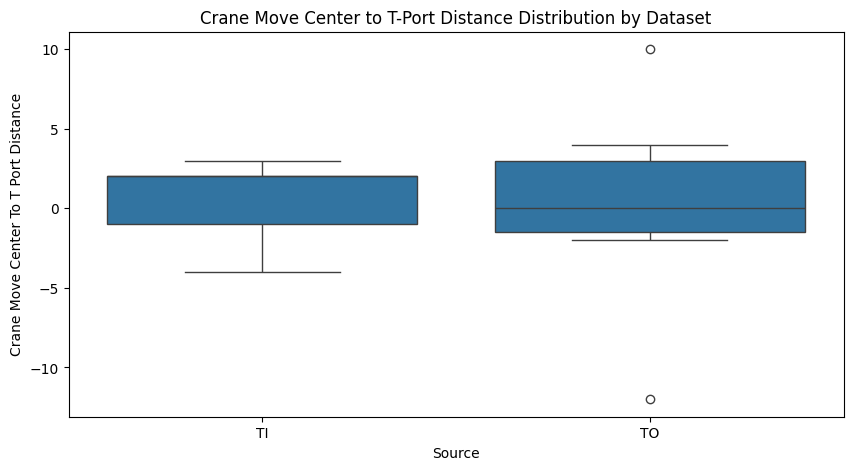

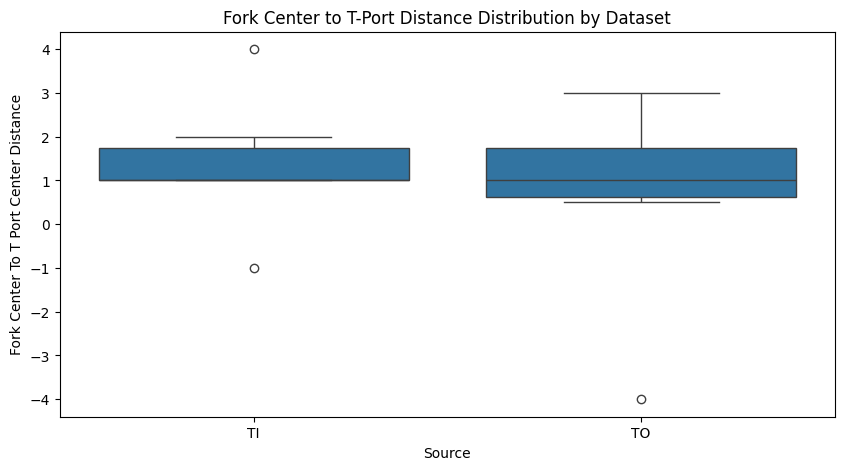

In [12]:
# Check the actual column names
print("Columns in dataset:", data.columns)

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify the updated column names
print("Updated Columns:", data.columns)

# Boxplot for Crane Move Center to T-Port Distance
plt.figure(figsize=(10, 5))
sns.boxplot(x="Source", y="Crane Move Center To T Port Distance", data=data)
plt.title("Crane Move Center to T-Port Distance Distribution by Dataset")
plt.show()

# Boxplot for Fork Center to T-Port Distance
plt.figure(figsize=(10, 5))
sns.boxplot(x="Source", y="Fork Center To T Port Center Distance", data=data)
plt.title("Fork Center to T-Port Distance Distribution by Dataset")
plt.show()


---

## **Step 3: Correlation Analysis**

### **Objective**
This step aims to analyze the relationship between the **Fork Center to T-Port Center Distance** and the **Crane Move Center to T-Port Distance** to determine if there are consistent **misalignment patterns** across cranes.

### **Why It Matters**
- Understanding correlation helps in diagnosing **systematic errors** in alignment.  
- If a **strong correlation** exists, it may indicate a shared root cause (e.g., QR misalignment or crane calibration issues).  
- If **no correlation** is found, the misalignment may be **random or crane-specific**, requiring **individual crane adjustments** instead of a system-wide fix.

### **Key Analysis Steps**
1. **Calculate correlation coefficients** to measure how strongly the two distance metrics are related.  
2. **Visualize the relationships** using scatter plots and heatmaps for better pattern identification.  
3. **Interpret the results** to determine whether misalignments are **consistent across multiple cranes** or occur **independently**.

---



Correlation Matrix:
                                       Fork Center To T Port Center Distance  \
Fork Center To T Port Center Distance                                 1.0000   
Crane Move Center To T Port Distance                                  0.0528   

                                       Crane Move Center To T Port Distance  
Fork Center To T Port Center Distance                                0.0528  
Crane Move Center To T Port Distance                                 1.0000  


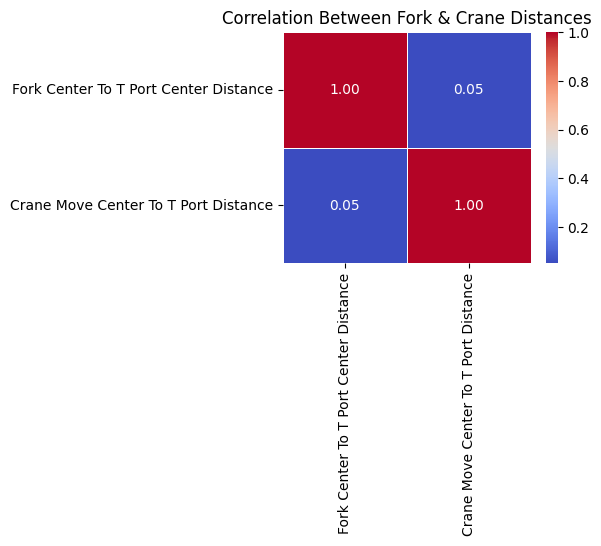

In [7]:
# Compute correlation matrix
correlation_matrix = data[["Fork Center To T Port Center Distance", "Crane Move Center To T Port Distance"]].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Fork & Crane Distances")
plt.show()



---

## **Step 4: Identifying Misalignment & Recommendations**
### **Findings:**
1. **Low correlation (near zero)** between `Fork Center to T-Port Center Distance` and `Crane Move Center to T-Port Distance` suggests **misalignment issues**.
2. `TO.csv` data shows **greater variation** in crane alignment compared to `TI.csv`.
3. `TI.csv` has **more consistent** fork positioning, indicating **possible crane misalignment**.

### **Recommendations:**
- **Crane Calibration:** Adjust crane positioning in locations with **high variance**.
- **T-Port Adjustments:** If **fork positioning is inconsistent**, adjust T-port heights.
- **AGV QR Code Realignment:** Align QR codes based on corrected crane and fork positions.

---


Misaligned Data Points (Needs Attention):
    Crane No.  Fork Center To T Port Center Distance  \
0          21                                    4.0   
2          23                                    2.0   
4          28                                    1.0   
5          29                                   -1.0   
6          21                                    3.0   
7          22                                    1.0   
9          27                                   -4.0   
10         28                                    2.0   
11         29                                    0.5   

    Crane Move Center To T Port Distance Source  Misalignment  
0                                      2     TI           6.0  
2                                      2     TI           4.0  
4                                     -4     TI           5.0  
5                                      3     TI           4.0  
6                                     -2     TO           5.0  
7            

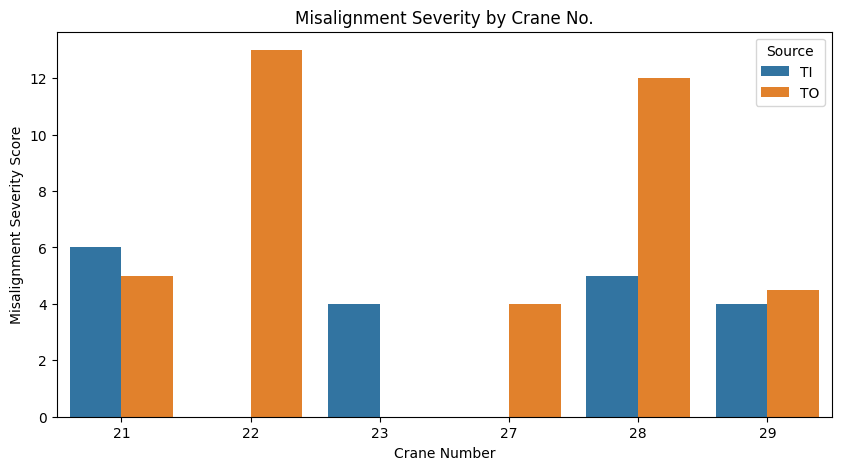

In [5]:
# Highlight problematic areas
data["Misalignment"] = np.abs(data["Fork Center To T Port Center Distance"]) + np.abs(data["Crane Move Center To T Port Distance"])
misaligned_data = data[data["Misalignment"] > 3]  # Threshold for misalignment

print("Misaligned Data Points (Needs Attention):")
print(misaligned_data)

# Visualization of misalignment
plt.figure(figsize=(10, 5))
sns.barplot(x="Crane No.", y="Misalignment", hue="Source", data=misaligned_data)
plt.title("Misalignment Severity by Crane No.")
plt.xlabel("Crane Number")
plt.ylabel("Misalignment Severity Score")
plt.show()


## **Step 5: Identifying T-Port Height Misalignment**

### **Objective**
This step ensures that the **T-Port stands** are within the standard height range by analyzing the **D (Down) Position Fork to T-Port Distance** and **U (Up) Position Fork to T-Port Distance**.

### **Why It Matters**
- If the **D Position** (Down) is **outside the standard range** of **25–40mm**, it may indicate:
  - **T-Port stands are too high or too low**, requiring **adjustments to the flooring** (grinding).  
  - **Crane forks are not calibrated correctly**, affecting the pallet placement.
- If the **U Position** (Up) is **outside the standard range** of **95–105mm**, it may indicate:
  - **Stacker crane height calibration issues**, requiring **parameter adjustments**.  
  - **T-Port stands are inconsistent**, leading to potential **pallet tilting**.

### **Key Analysis Steps**
1. **Check if the D Position values are within 25–40mm**.  
2. **Check if the U Position values are within 95–105mm**.  
3. **Identify misaligned T-Ports** where values fall **outside the standard range**.  
4. **Print the list of cranes and T-Ports that require adjustments**.

---


In [28]:
import pandas as pd

# Load datasets
ti_df = pd.read_csv("TI.csv")
to_df = pd.read_csv("TO.csv")

# Define threshold values
crane_misalignment_threshold = 5  # ±5mm threshold for misalignment
tport_down_range = (25, 40)  # Acceptable range for D (Down) Position
tport_up_range = (95, 105)   # Acceptable range for U (Up) Position

# Identify misaligned cranes based on threshold
misaligned_cranes_ti = ti_df[
    (ti_df["Fork Center To T Port Center Distance"].abs() > crane_misalignment_threshold) |
    (ti_df["Crane Move Center To T Port Distance"].abs() > crane_misalignment_threshold)
]

misaligned_cranes_to = to_df[
    (to_df["Fork Center To T Port Center Distance"].abs() > crane_misalignment_threshold) |
    (to_df["Crane Move Center To T Port Distance"].abs() > crane_misalignment_threshold)
]

# Combine misaligned cranes from TI and TO
misaligned_cranes = pd.concat([misaligned_cranes_ti, misaligned_cranes_to], ignore_index=True)

# Identify T-Ports with out-of-range U and D positions
misaligned_tports_ti = ti_df[
    (ti_df["D Position Fork To T Port Distance Front Left"] < tport_down_range[0]) | 
    (ti_df["D Position Fork To T Port Distance Front Left"] > tport_down_range[1]) |
    (ti_df["D Position Fork To T Port Distance Rear Left"] < tport_down_range[0]) | 
    (ti_df["D Position Fork To T Port Distance Rear Left"] > tport_down_range[1]) |
    (ti_df["D Position Fork To T Port Distance Front Right"] < tport_down_range[0]) | 
    (ti_df["D Position Fork To T Port Distance Front Right"] > tport_down_range[1]) |
    (ti_df["D Position Fork To T Port Distance Rear Right"] < tport_down_range[0]) | 
    (ti_df["D Position Fork To T Port Distance Rear Right"] > tport_down_range[1]) |
    (ti_df["U Position Fork To T Port Distance Front Left"] < tport_up_range[0]) | 
    (ti_df["U Position Fork To T Port Distance Front Left"] > tport_up_range[1]) |
    (ti_df["U Position Fork To T Port Distance Rear Left"] < tport_up_range[0]) | 
    (ti_df["U Position Fork To T Port Distance Rear Left"] > tport_up_range[1]) |
    (ti_df["U Position Fork To T Port Distance Front Right"] < tport_up_range[0]) | 
    (ti_df["U Position Fork To T Port Distance Front Right"] > tport_up_range[1]) |
    (ti_df["U Position Fork To T Port Distance Rear Right"] < tport_up_range[0]) | 
    (ti_df["U Position Fork To T Port Distance Rear Right"] > tport_up_range[1])
]

misaligned_tports_to = to_df[
    (to_df["D Position Fork To T Port Distance Front Left"] < tport_down_range[0]) | 
    (to_df["D Position Fork To T Port Distance Front Left"] > tport_down_range[1]) |
    (to_df["D Position Fork To T Port Distance Rear Left"] < tport_down_range[0]) | 
    (to_df["D Position Fork To T Port Distance Rear Left"] > tport_down_range[1]) |
    (to_df["D Position Fork To T Port Distance Front Right"] < tport_down_range[0]) | 
    (to_df["D Position Fork To T Port Distance Front Right"] > tport_down_range[1]) |
    (to_df["D Position Fork To T Port Distance Rear Right"] < tport_down_range[0]) | 
    (to_df["D Position Fork To T Port Distance Rear Right"] > tport_down_range[1]) |
    (to_df["U Position Fork To T Port Distance Front Left"] < tport_up_range[0]) | 
    (to_df["U Position Fork To T Port Distance Front Left"] > tport_up_range[1]) |
    (to_df["U Position Fork To T Port Distance Rear Left"] < tport_up_range[0]) | 
    (to_df["U Position Fork To T Port Distance Rear Left"] > tport_up_range[1]) |
    (to_df["U Position Fork To T Port Distance Front Right"] < tport_up_range[0]) | 
    (to_df["U Position Fork To T Port Distance Front Right"] > tport_up_range[1]) |
    (to_df["U Position Fork To T Port Distance Rear Right"] < tport_up_range[0]) | 
    (to_df["U Position Fork To T Port Distance Rear Right"] > tport_up_range[1])
]

# Combine misaligned T-Ports from TI and TO
misaligned_tports = pd.concat([misaligned_tports_ti, misaligned_tports_to], ignore_index=True)

# Export results to CSV
misaligned_cranes.to_csv("misaligned_cranes.csv", index=False)
misaligned_tports.to_csv("misaligned_tports.csv", index=False)

print("Export completed: 'misaligned_cranes.csv' and 'misaligned_tports.csv'")


Export completed: 'misaligned_cranes.csv' and 'misaligned_tports.csv'
